In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('AB_Test_Results.xlsx')

In [36]:
#check head
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [37]:
# Integrity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
USER_ID         10000 non-null int64
VARIANT_NAME    10000 non-null object
REVENUE         10000 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [38]:
# Describe
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [39]:
# Check levels
df.sort_values(by='REVENUE', ascending=False).head(10)

,USER_ID,VARIANT_NAME,REVENUE
1437,3342,control,196.01
6447,2881,variant,58.63
7642,7206,variant,57.46
9421,6792,control,41.53
8168,2166,control,29.32
9125,831,control,25.98
2482,7356,variant,23.04
6412,1053,control,20.07
5217,3684,variant,19.47
5530,282,control,18.56


In [40]:
df_users = df.groupby('USER_ID').count()
df_users.head()

,VARIANT_NAME,REVENUE
USER_ID,,
2,3,3
3,3,3
4,1,1
5,1,1
6,1,1


In [42]:
df[df['USER_ID'] == 3]

,USER_ID,VARIANT_NAME,REVENUE
4145,3,variant,0.0
5377,3,control,0.0
7409,3,variant,0.0


### **ВЫВОДЫ**

У нас есть **10,000** строк и 3 столбца, все поля заполнены. Отлично!

Столбцами являются userid, variant_name, revenue.
Два столбца содержат числа, а один объекты.

Столбец варианта в нашем фрейме данных отражает версии variant и control.

Эти две версии дают нам прекрасную отправную точку для тестирования AB.

**Sanity Check**

Давайте сначала определим размеры выборок, с которыми мы имеем дело, чтобы убедиться, что мы можем приступить к статистически обоснованному сравнению.

In [7]:
# Counting the number of users in each AB group.
A = df[df.VARIANT_NAME == "variant"].sort_values(by="REVENUE")
B = df[df.VARIANT_NAME == "control"].sort_values(by="REVENUE")

print(A.count(), B.count())


USER_ID         5016
VARIANT_NAME    5016
REVENUE         5016
dtype: int64 USER_ID         4984
VARIANT_NAME    4984
REVENUE         4984
dtype: int64


Из общего числа наших 10 000 записей примерно половина представляет старую версию (которую мы будем называть группой A), а другая половина использует измененную версию (которую мы будем называть версией B).

Это здорово, мы можем приступить к анализу.

In [8]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

In [9]:
mannwhitneyu(A.REVENUE, B.REVENUE)

MannwhitneyuResult(statistic=12478180.0, pvalue=0.2391262398264743)

Тест Манна-Уитни показывает, что статистически значимых различий между 2-мя группами нет.

In [10]:
ttest_ind(A.REVENUE, B.REVENUE)

Ttest_indResult(statistic=-1.2711634519010084, pvalue=0.20370007853373565)

Тест Стъюдента показывает, что две выборки с большой долей вероятности взяты из генеральных совокупностей, которые имеют одно и то же среднее.

In [11]:
from scipy.stats import kstest
print(kstest(A.REVENUE, 'norm'))
print(kstest(B.REVENUE, 'norm'))

KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)


Тест Колмогорова-Смирнова показывает, что данные паспределены нормально.

Попробуем сделать визуализацию данных, чтобы наглядно показать их схожесть или различия:

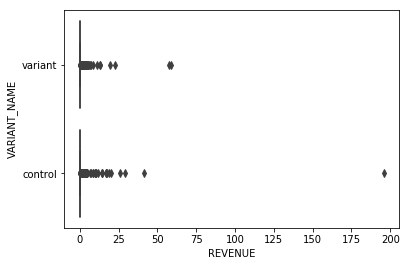

In [63]:
sns.boxplot(data=df, x="REVENUE", y="VARIANT_NAME")

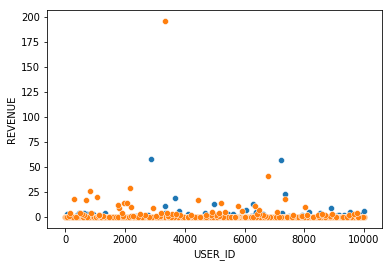

In [62]:
# Plotting the distribution of players that played 0 to 100 game rounds
sns.scatterplot(data=A, x='USER_ID', y='REVENUE')
sns.scatterplot(data=B, x='USER_ID', y='REVENUE');

#### **ВЫВОД:**

Похоже, что статистически значимых различий между выборками нет.

На графиках видим, что есть несколько выбросов, которые вряд ли смогут охарактеризовать данные и ответить на вопрос, какая из версий - А или В - выгоднее.

Рекомендации менеджеру - не выкатывать изменение В.